# Análisis de Regresión Lineal con el Dataset Advertising

## Descripción del Dataset

El dataset **Advertising** es un conjunto de datos clásico utilizado para enseñar conceptos de regresión lineal. Contiene información sobre presupuestos de publicidad en tres medios diferentes (TV, Radio y Periódico) y las ventas resultantes de productos.

### Variables del dataset:
- **TV**: Presupuesto de publicidad en televisión (en miles de dólares)
- **Radio**: Presupuesto de publicidad en radio (en miles de dólares)
- **Newspaper**: Presupuesto de publicidad en periódicos (en miles de dólares)
- **Sales**: Ventas del producto (en miles de unidades)

El objetivo es predecir las ventas basándose en los presupuestos de publicidad, lo que permite a las empresas optimizar su inversión en marketing.

## 1. Importar librerías y descargar datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [2]:
# Descargar y leer el dataset
url = 'https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv'
advertising = pd.read_csv(url, index_col=0)

print("Dataset cargado exitosamente!")
print(f"Dimensiones del dataset: {advertising.shape}")
print(f"Columnas: {advertising.columns.tolist()}")

Dataset cargado exitosamente!
Dimensiones del dataset: (200, 4)
Columnas: ['TV', 'Radio', 'Newspaper', 'Sales']


## 2. Análisis Exploratorio de Datos (EDA)

In [3]:
# Primeras filas del dataset
advertising.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
# Información general del dataset
advertising.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [5]:
# Estadísticas descriptivas
advertising.describe().round(2)

,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,14.02
std,85.85,14.85,21.78,5.22
min,0.70,0.00,0.30,1.60
25%,74.38,9.98,12.75,10.38
50%,149.75,22.90,25.75,12.90
75%,218.82,36.52,45.10,17.40
max,296.40,49.60,114.00,27.00


In [6]:
# Verificar valores nulos
print("Valores nulos por columna:")
print(advertising.isnull().sum())

Valores nulos por columna:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [7]:
# Matriz de correlación
correlation_matrix = advertising.corr()
print("\nMatriz de correlación:")
print(correlation_matrix.round(3))


Matriz de correlación:
              TV  Radio  Newspaper  Sales
TV         1.000  0.055      0.057  0.782
Radio      0.055  1.000      0.354  0.576
Newspaper  0.057  0.354      1.000  0.228
Sales      0.782  0.576      0.228  1.000


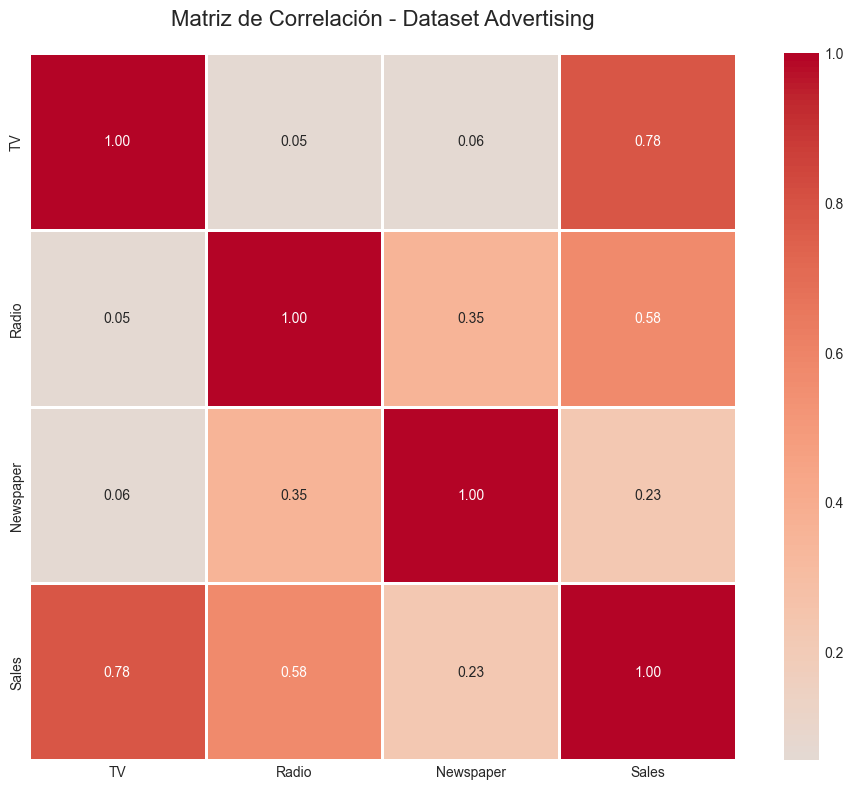

In [8]:
# Visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.2f')
plt.title('Matriz de Correlación - Dataset Advertising', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

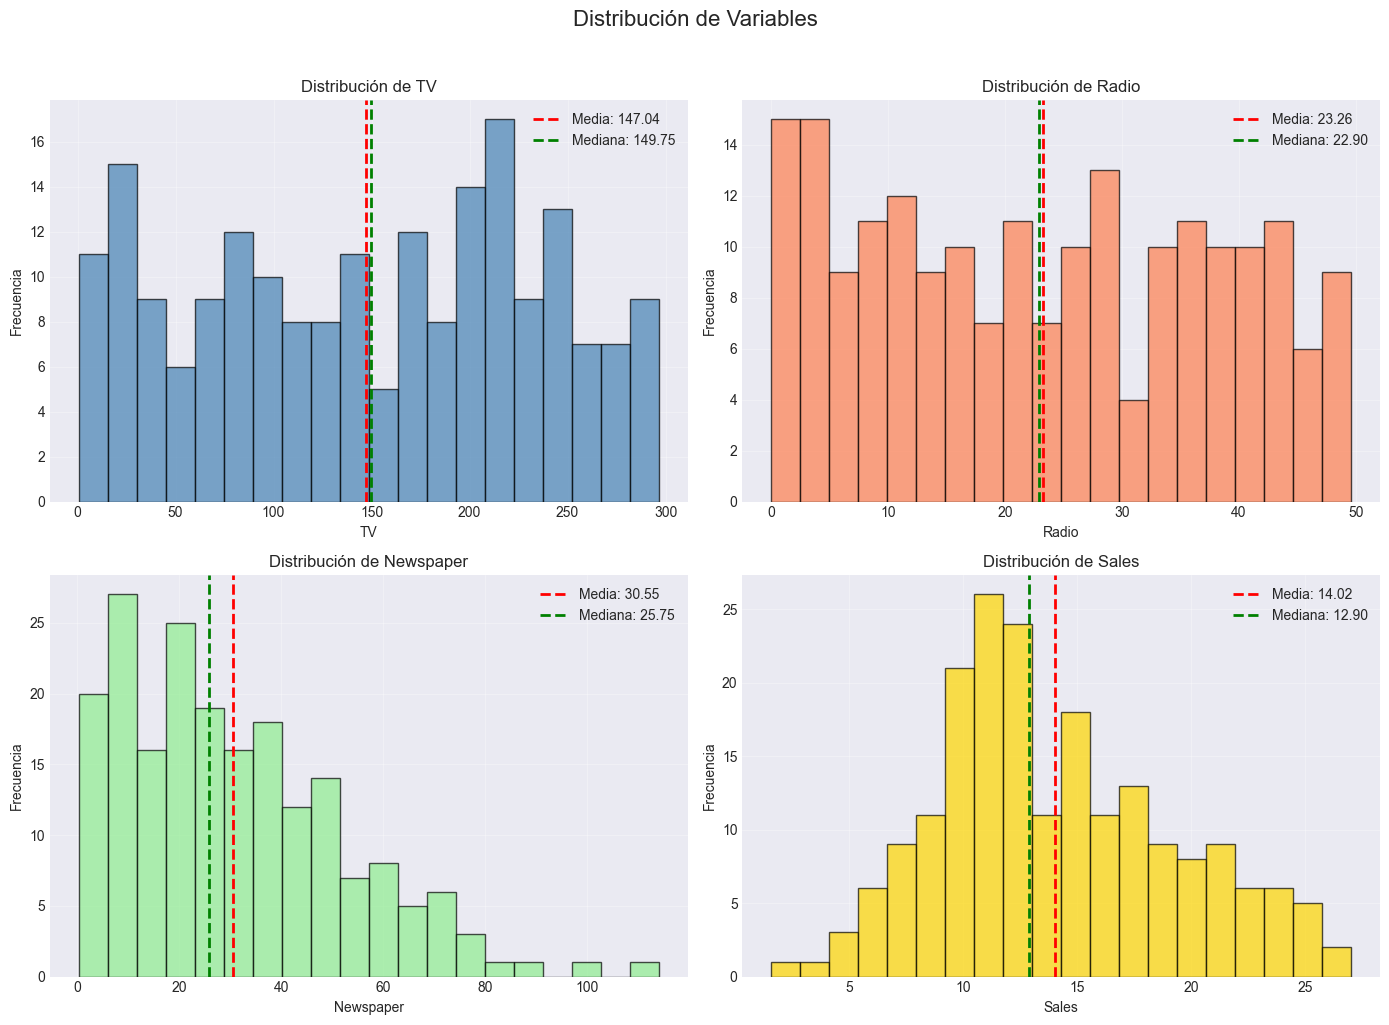

In [9]:
# Distribución de las variables
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribución de Variables', fontsize=16, y=1.02)

variables = ['TV', 'Radio', 'Newspaper', 'Sales']
colors = ['steelblue', 'coral', 'lightgreen', 'gold']

for idx, (ax, var, color) in enumerate(zip(axes.flat, variables, colors)):
    ax.hist(advertising[var], bins=20, edgecolor='black', alpha=0.7, color=color)
    ax.set_title(f'Distribución de {var}', fontsize=12)
    ax.set_xlabel(var)
    ax.set_ylabel('Frecuencia')
    ax.grid(True, alpha=0.3)
    
    # Agregar estadísticas
    mean_val = advertising[var].mean()
    median_val = advertising[var].median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Mediana: {median_val:.2f}')
    ax.legend()

plt.tight_layout()
plt.show()

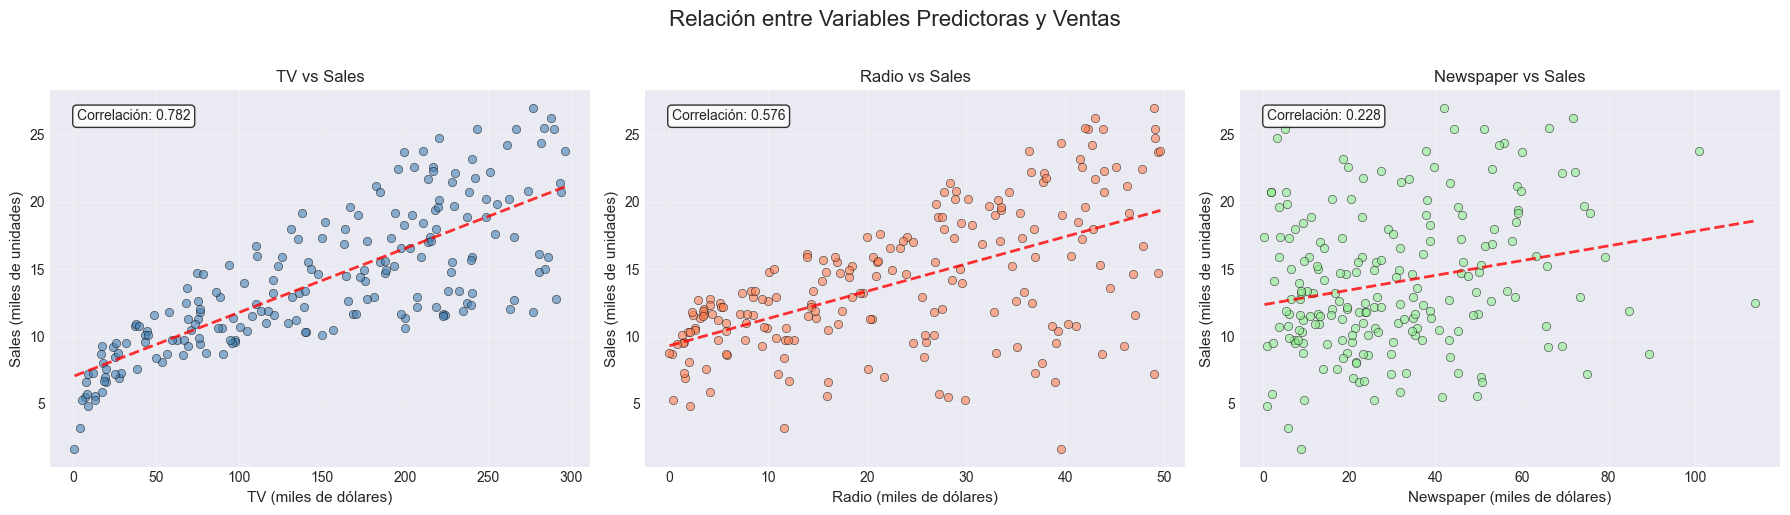

In [10]:
# Relación entre cada variable predictora y las ventas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Relación entre Variables Predictoras y Ventas', fontsize=16, y=1.02)

predictors = ['TV', 'Radio', 'Newspaper']
colors = ['steelblue', 'coral', 'lightgreen']

for ax, predictor, color in zip(axes, predictors, colors):
    ax.scatter(advertising[predictor], advertising['Sales'], alpha=0.6, color=color, edgecolors='black', linewidth=0.5)
    ax.set_xlabel(f'{predictor} (miles de dólares)', fontsize=11)
    ax.set_ylabel('Sales (miles de unidades)', fontsize=11)
    ax.set_title(f'{predictor} vs Sales', fontsize=12)
    ax.grid(True, alpha=0.3)
    
    # Agregar línea de tendencia
    z = np.polyfit(advertising[predictor], advertising['Sales'], 1)
    p = np.poly1d(z)
    ax.plot(advertising[predictor].sort_values(), p(advertising[predictor].sort_values()), 
            "r--", alpha=0.8, linewidth=2)
    
    # Agregar correlación
    corr = advertising[[predictor, 'Sales']].corr().iloc[0, 1]
    ax.text(0.05, 0.95, f'Correlación: {corr:.3f}', transform=ax.transAxes, 
            fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

<Figure size 1200x1000 with 0 Axes>

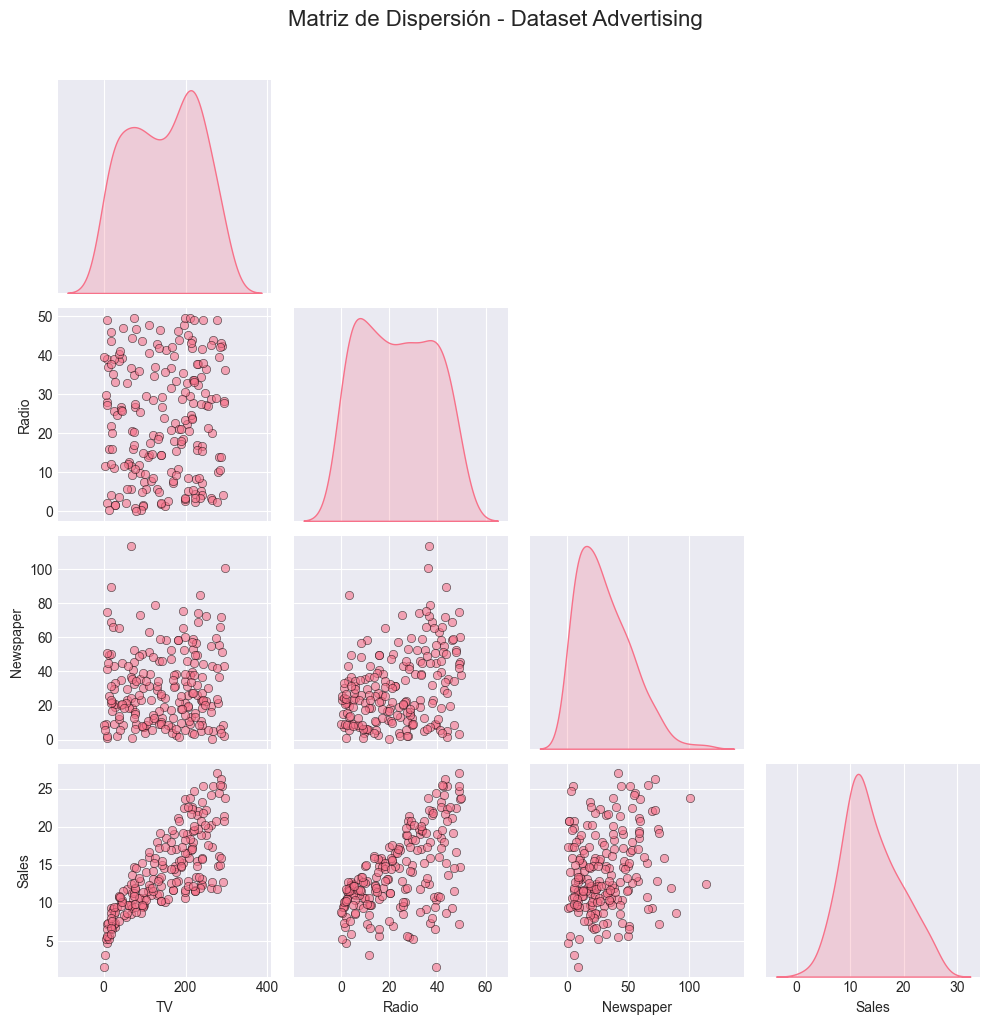

In [11]:
# Pairplot para visualizar todas las relaciones
plt.figure(figsize=(12, 10))
sns.pairplot(advertising, diag_kind='kde', corner=True, 
             plot_kws={'alpha': 0.6, 'edgecolor': 'black', 'linewidth': 0.5})
plt.suptitle('Matriz de Dispersión - Dataset Advertising', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

## 3. Preparación de Datos: División Train-Test

In [12]:
# Separar características (X) y variable objetivo (y)
X = advertising[['TV', 'Radio', 'Newspaper']]
y = advertising['Sales']

print("Características (X):")
print(X.head())
print(f"\nForma de X: {X.shape}")
print(f"Forma de y: {y.shape}")

Características (X):
      TV  Radio  Newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4

Forma de X: (200, 3)
Forma de y: (200,)


In [13]:
# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("División de datos completada:")
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras ({X_test.shape[0]/len(X)*100:.1f}%)")

División de datos completada:
Tamaño del conjunto de entrenamiento: 160 muestras (80.0%)
Tamaño del conjunto de prueba: 40 muestras (20.0%)


In [14]:
# Estandarización de características para Ridge y Lasso
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Datos estandarizados para Ridge y Lasso")
print(f"Media de X_train_scaled: {X_train_scaled.mean(axis=0).round(10)}")
print(f"Desviación estándar de X_train_scaled: {X_train_scaled.std(axis=0).round(2)}")

Datos estandarizados para Ridge y Lasso
Media de X_train_scaled: [-0. -0.  0.]
Desviación estándar de X_train_scaled: [1. 1. 1.]


## 4. Modelos de Regresión

### 4.1 Regresión Lineal Normal (OLS)

In [15]:
# Entrenar modelo de regresión lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicciones
y_pred_lr_train = lr_model.predict(X_train)
y_pred_lr_test = lr_model.predict(X_test)

# Métricas
mse_lr_train = mean_squared_error(y_train, y_pred_lr_train)
mse_lr_test = mean_squared_error(y_test, y_pred_lr_test)
rmse_lr_train = np.sqrt(mse_lr_train)
rmse_lr_test = np.sqrt(mse_lr_test)
r2_lr_train = r2_score(y_train, y_pred_lr_train)
r2_lr_test = r2_score(y_test, y_pred_lr_test)
mae_lr_train = mean_absolute_error(y_train, y_pred_lr_train)
mae_lr_test = mean_absolute_error(y_test, y_pred_lr_test)


print("="*50)
print("REGRESIÓN LINEAL NORMAL (OLS)")
print("="*50)
print(f"\nCoeficientes:")
for feature, coef in zip(X.columns, lr_model.coef_):
    print(f"  {feature}: {coef:.6f}")
print(f"\nIntercepto: {lr_model.intercept_:.6f}")
print(f"\nMétricas en Entrenamiento:")
print(f"  RMSE: {rmse_lr_train:.4f}")
print(f"  R²: {r2_lr_train:.4f}")
print(f"  MAE: {mae_lr_train:.4f}")
print(f"\nMétricas en Prueba:")
print(f"  RMSE: {rmse_lr_test:.4f}")
print(f"  R²: {r2_lr_test:.4f}")
print(f"  MAE: {mae_lr_test:.4f}")

REGRESIÓN LINEAL NORMAL (OLS)

Coeficientes:
  TV: 0.044730
  Radio: 0.189195
  Newspaper: 0.002761

Intercepto: 2.979067

Métricas en Entrenamiento:
  RMSE: 1.6447
  R²: 0.8957
  MAE: 1.1985

Métricas en Prueba:
  RMSE: 1.7816
  R²: 0.8994
  MAE: 1.4608


### 4.2 Regresión Ridge

In [16]:
# Probar diferentes valores de alpha
alphas_ridge = [0.001, 0.01, 0.1, 1, 10, 100]
ridge_results = []

for alpha in alphas_ridge:
    ridge_model = Ridge(alpha=alpha, random_state=42)
    ridge_model.fit(X_train_scaled, y_train)
    
    y_pred_train = ridge_model.predict(X_train_scaled)
    y_pred_test = ridge_model.predict(X_test_scaled)
    
    ridge_results.append({
        'alpha': alpha,
        'rmse_train': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'rmse_test': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'r2_train': r2_score(y_train, y_pred_train),
        'r2_test': r2_score(y_test, y_pred_test)
    })

# Convertir a DataFrame para mejor visualización
ridge_df = pd.DataFrame(ridge_results)
print("Resultados de Ridge con diferentes valores de alpha:")
print(ridge_df.to_string(index=False))

Resultados de Ridge con diferentes valores de alpha:
  alpha  rmse_train  rmse_test  r2_train  r2_test
  0.001    1.644728   1.781605  0.895701 0.899437
  0.010    1.644728   1.781654  0.895701 0.899432
  0.100    1.644730   1.782143  0.895700 0.899377
  1.000    1.644987   1.787220  0.895668 0.898803
 10.000    1.667636   1.853716  0.892775 0.891132
100.000    2.427323   2.786288  0.772832 0.754039


In [17]:
# Seleccionar el mejor alpha basado en RMSE de prueba
best_alpha_ridge = ridge_df.loc[ridge_df['rmse_test'].idxmin(), 'alpha']
print(f"\nMejor alpha para Ridge: {best_alpha_ridge}")

# Entrenar modelo final con mejor alpha
ridge_model_best = Ridge(alpha=best_alpha_ridge, random_state=42)
ridge_model_best.fit(X_train_scaled, y_train)

# Predicciones
y_pred_ridge_train = ridge_model_best.predict(X_train_scaled)
y_pred_ridge_test = ridge_model_best.predict(X_test_scaled)

# Métricas
mse_ridge_train = mean_squared_error(y_train, y_pred_ridge_train)
mse_ridge_test = mean_squared_error(y_test, y_pred_ridge_test)
rmse_ridge_train = np.sqrt(mse_ridge_train)
rmse_ridge_test = np.sqrt(mse_ridge_test)
r2_ridge_train = r2_score(y_train, y_pred_ridge_train)
r2_ridge_test = r2_score(y_test, y_pred_ridge_test)
mae_ridge_train = mean_absolute_error(y_train, y_pred_ridge_train)
mae_ridge_test = mean_absolute_error(y_test, y_pred_ridge_test)

print("\n" + "="*50)
print(f"REGRESIÓN RIDGE (alpha={best_alpha_ridge})")
print("="*50)
print(f"\nCoeficientes:")
for feature, coef in zip(X.columns, ridge_model_best.coef_):
    print(f"  {feature}: {coef:.6f}")
print(f"\nIntercepto: {ridge_model_best.intercept_:.6f}")
print(f"\nMétricas en Entrenamiento:")
print(f"  RMSE: {rmse_ridge_train:.4f}")
print(f"  R²: {r2_ridge_train:.4f}")
print(f"  MAE: {mae_ridge_train:.4f}")
print(f"\nMétricas en Prueba:")
print(f"  RMSE: {rmse_ridge_test:.4f}")
print(f"  R²: {r2_ridge_test:.4f}")
print(f"  MAE: {mae_ridge_test:.4f}")


Mejor alpha para Ridge: 0.001

REGRESIÓN RIDGE (alpha=0.001)

Coeficientes:
  TV: 3.764174
  Radio: 2.792288
  Newspaper: 0.055983

Intercepto: 14.100000

Métricas en Entrenamiento:
  RMSE: 1.6447
  R²: 0.8957
  MAE: 1.1985

Métricas en Prueba:
  RMSE: 1.7816
  R²: 0.8994
  MAE: 1.4608


### 4.3 Regresión Lasso

In [18]:
# Probar diferentes valores de alpha
alphas_lasso = [0.001, 0.01, 0.1, 1, 10, 100]
lasso_results = []

for alpha in alphas_lasso:
    lasso_model = Lasso(alpha=alpha, random_state=42, max_iter=10000)
    lasso_model.fit(X_train_scaled, y_train)
    
    y_pred_train = lasso_model.predict(X_train_scaled)
    y_pred_test = lasso_model.predict(X_test_scaled)
    
    lasso_results.append({
        'alpha': alpha,
        'rmse_train': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'rmse_test': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'r2_train': r2_score(y_train, y_pred_train),
        'r2_test': r2_score(y_test, y_pred_test),
        'n_features': np.sum(lasso_model.coef_ != 0)
    })

# Convertir a DataFrame para mejor visualización
lasso_df = pd.DataFrame(lasso_results)
print("Resultados de Lasso con diferentes valores de alpha:")
print(lasso_df.to_string(index=False))

Resultados de Lasso con diferentes valores de alpha:
  alpha  rmse_train  rmse_test  r2_train   r2_test  n_features
  0.001    1.644728   1.781587  0.895701  0.899439           3
  0.010    1.644799   1.781551  0.895692  0.899443           3
  0.100    1.651293   1.791334  0.894867  0.898336           2
  1.000    2.146055   2.396806  0.822428  0.817997           2
 10.000    5.092764   5.631496  0.000000 -0.004757           0
100.000    5.092764   5.631496  0.000000 -0.004757           0


In [19]:
# Seleccionar el mejor alpha basado en RMSE de prueba
best_alpha_lasso = lasso_df.loc[lasso_df['rmse_test'].idxmin(), 'alpha']
print(f"\nMejor alpha para Lasso: {best_alpha_lasso}")

# Entrenar modelo final con mejor alpha
lasso_model_best = Lasso(alpha=best_alpha_lasso, random_state=42, max_iter=10000)
lasso_model_best.fit(X_train_scaled, y_train)

# Predicciones
y_pred_lasso_train = lasso_model_best.predict(X_train_scaled)
y_pred_lasso_test = lasso_model_best.predict(X_test_scaled)

# Métricas
mse_lasso_train = mean_squared_error(y_train, y_pred_lasso_train)
mse_lasso_test = mean_squared_error(y_test, y_pred_lasso_test)
rmse_lasso_train = np.sqrt(mse_lasso_train)
rmse_lasso_test = np.sqrt(mse_lasso_test)
r2_lasso_train = r2_score(y_train, y_pred_lasso_train)
r2_lasso_test = r2_score(y_test, y_pred_lasso_test)
mae_lasso_train = mean_absolute_error(y_train, y_pred_lasso_train)
mae_lasso_test = mean_absolute_error(y_test, y_pred_lasso_test)

print("\n" + "="*50)
print(f"REGRESIÓN LASSO (alpha={best_alpha_lasso})")
print("="*50)
print(f"\nCoeficientes:")
for feature, coef in zip(X.columns, lasso_model_best.coef_):
    if coef != 0:
        print(f"  {feature}: {coef:.6f}")
    else:
        print(f"  {feature}: {coef:.6f} (eliminado)")
print(f"\nIntercepto: {lasso_model_best.intercept_:.6f}")
print(f"\nCaracterísticas seleccionadas: {np.sum(lasso_model_best.coef_ != 0)} de {len(X.columns)}")
print(f"\nMétricas en Entrenamiento:")
print(f"  RMSE: {rmse_lasso_train:.4f}")
print(f"  R²: {r2_lasso_train:.4f}")
print(f"  MAE: {mae_lasso_train:.4f}")
print(f"\nMétricas en Prueba:")
print(f"  RMSE: {rmse_lasso_test:.4f}")
print(f"  R²: {r2_lasso_test:.4f}")
print(f"  MAE: {mae_lasso_test:.4f}")


Mejor alpha para Lasso: 0.01

REGRESIÓN LASSO (alpha=0.01)

Coeficientes:
  TV: 3.754675
  Radio: 2.785686
  Newspaper: 0.048727

Intercepto: 14.100000

Características seleccionadas: 3 de 3

Métricas en Entrenamiento:
  RMSE: 1.6448
  R²: 0.8957
  MAE: 1.1983

Métricas en Prueba:
  RMSE: 1.7816
  R²: 0.8994
  MAE: 1.4590


### 4.4 Ejercicio de clase

Ahora les toca implementar la validación cruzada que se vio en [Selección de hiperparámetros](https://nasaul.github.io/mineria_datos_itam/03-regresion_lineal.html#validaci%C3%B3n-de-modelos-y-selecci%C3%B3n-de-hiperpar%C3%A1metros)

## 5. Comparación de Modelos

In [20]:
# Crear tabla comparativa
comparison_data = {
    'Modelo': ['Linear Regression', f'Ridge (α={best_alpha_ridge})', f'Lasso (α={best_alpha_lasso})'],
    'RMSE Train': [rmse_lr_train, rmse_ridge_train, rmse_lasso_train],
    'RMSE Test': [rmse_lr_test, rmse_ridge_test, rmse_lasso_test],
    'R² Train': [r2_lr_train, r2_ridge_train, r2_lasso_train],
    'R² Test': [r2_lr_test, r2_ridge_test, r2_lasso_test],
    'MAE Test': [mae_lr_test, mae_ridge_test, mae_lasso_test]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.round(4)

print("\n" + "="*70)
print("COMPARACIÓN DE MODELOS")
print("="*70)
print(comparison_df.to_string(index=False))

# Identificar el mejor modelo
best_model_idx = comparison_df['RMSE Test'].idxmin()
best_model_name = comparison_df.loc[best_model_idx, 'Modelo']
print(f"\n🏆 Mejor modelo basado en RMSE de prueba: {best_model_name}")


COMPARACIÓN DE MODELOS
           Modelo  RMSE Train  RMSE Test  R² Train  R² Test  MAE Test
Linear Regression      1.6447     1.7816    0.8957   0.8994    1.4608
  Ridge (α=0.001)      1.6447     1.7816    0.8957   0.8994    1.4608
   Lasso (α=0.01)      1.6448     1.7816    0.8957   0.8994    1.4590

🏆 Mejor modelo basado en RMSE de prueba: Linear Regression


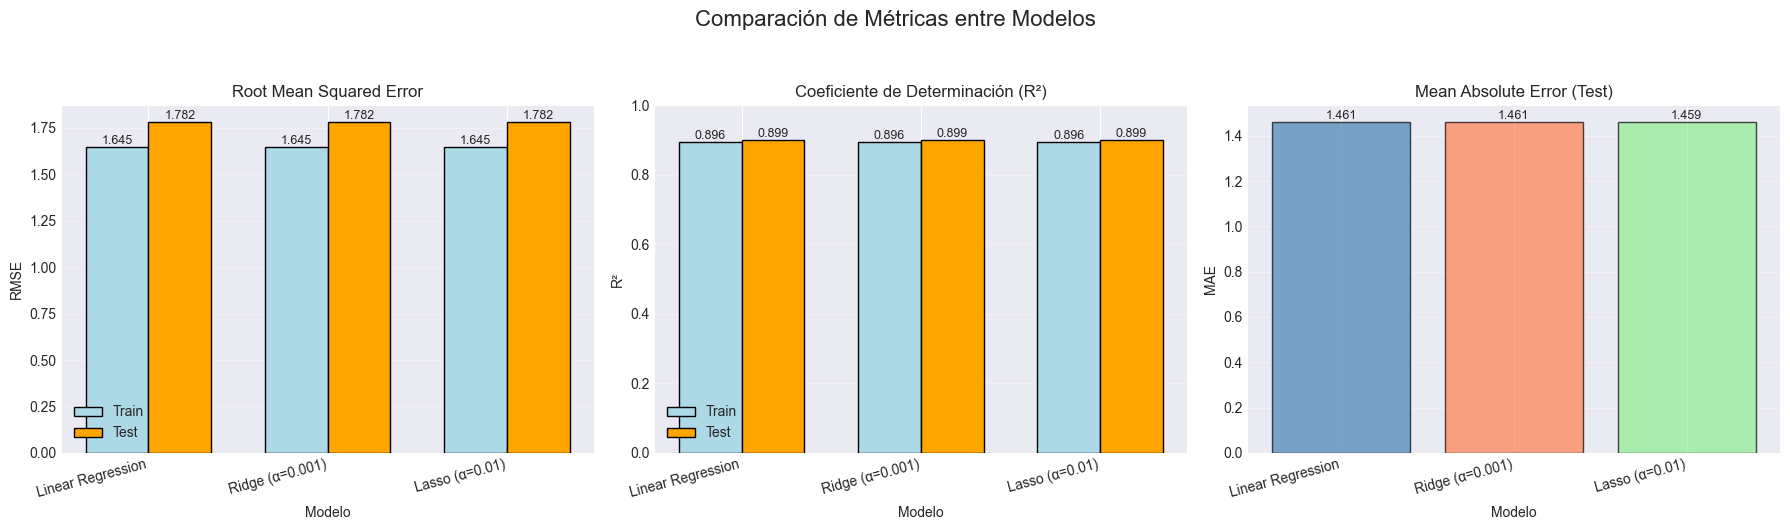

In [21]:
# Visualización de métricas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Comparación de Métricas entre Modelos', fontsize=16, y=1.05)

models = comparison_df['Modelo'].tolist()
x_pos = np.arange(len(models))
colors = ['steelblue', 'coral', 'lightgreen']

# RMSE
ax1 = axes[0]
width = 0.35
bars1 = ax1.bar(x_pos - width/2, comparison_df['RMSE Train'], width, label='Train', color='lightblue', edgecolor='black')
bars2 = ax1.bar(x_pos + width/2, comparison_df['RMSE Test'], width, label='Test', color='orange', edgecolor='black')
ax1.set_xlabel('Modelo')
ax1.set_ylabel('RMSE')
ax1.set_title('Root Mean Squared Error')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(models, rotation=15, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# R²
ax2 = axes[1]
bars3 = ax2.bar(x_pos - width/2, comparison_df['R² Train'], width, label='Train', color='lightblue', edgecolor='black')
bars4 = ax2.bar(x_pos + width/2, comparison_df['R² Test'], width, label='Test', color='orange', edgecolor='black')
ax2.set_xlabel('Modelo')
ax2.set_ylabel('R²')
ax2.set_title('Coeficiente de Determinación (R²)')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(models, rotation=15, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_ylim([0, 1])

# MAE
ax3 = axes[2]
bars5 = ax3.bar(x_pos, comparison_df['MAE Test'], color=colors, edgecolor='black', alpha=0.7)
ax3.set_xlabel('Modelo')
ax3.set_ylabel('MAE')
ax3.set_title('Mean Absolute Error (Test)')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(models, rotation=15, ha='right')
ax3.grid(True, alpha=0.3, axis='y')

# Agregar valores en las barras
for bars in [bars1, bars2, bars3, bars4, bars5]:
    for bar in bars:
        height = bar.get_height()
        if bars in [bars3, bars4]:  # Para R²
            ax = ax2
        elif bars in [bars1, bars2]:  # Para RMSE
            ax = ax1
        else:  # Para MAE
            ax = ax3
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

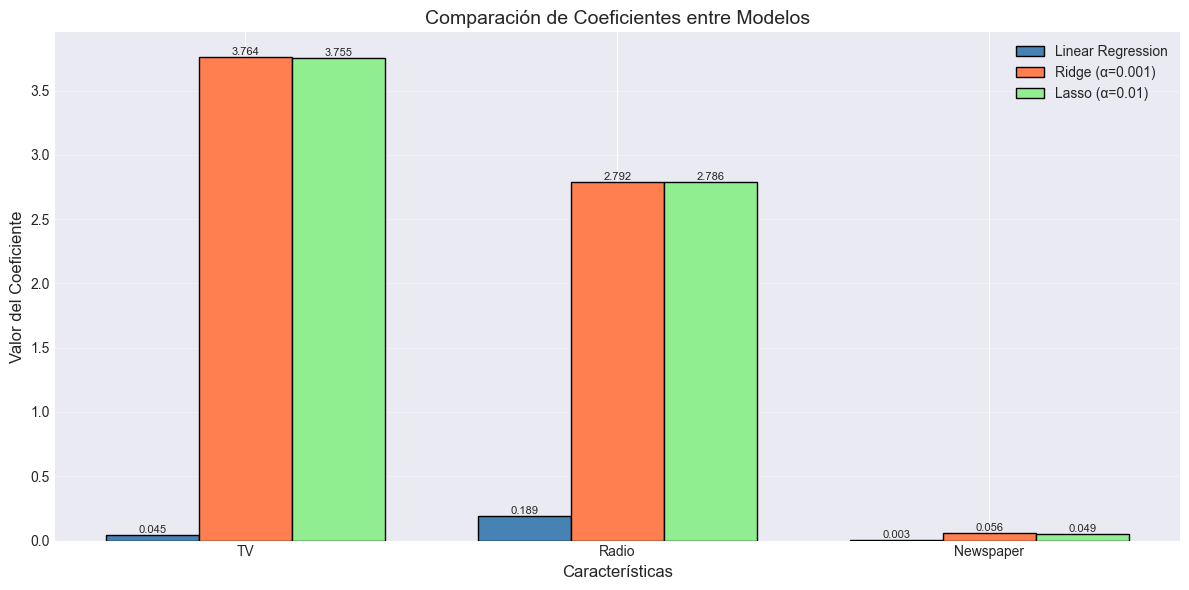

In [22]:
# Visualización de coeficientes
fig, ax = plt.subplots(figsize=(12, 6))

features = X.columns.tolist()
x_pos = np.arange(len(features))
width = 0.25

# Coeficientes de cada modelo
coef_lr = lr_model.coef_
coef_ridge = ridge_model_best.coef_
coef_lasso = lasso_model_best.coef_

bars1 = ax.bar(x_pos - width, coef_lr, width, label='Linear Regression', color='steelblue', edgecolor='black')
bars2 = ax.bar(x_pos, coef_ridge, width, label=f'Ridge (α={best_alpha_ridge})', color='coral', edgecolor='black')
bars3 = ax.bar(x_pos + width, coef_lasso, width, label=f'Lasso (α={best_alpha_lasso})', color='lightgreen', edgecolor='black')

ax.set_xlabel('Características', fontsize=12)
ax.set_ylabel('Valor del Coeficiente', fontsize=12)
ax.set_title('Comparación de Coeficientes entre Modelos', fontsize=14)
ax.set_xticks(x_pos)
ax.set_xticklabels(features)
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3, axis='y')
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

# Agregar valores en las barras
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        if abs(height) > 0.001:
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.3f}', ha='center', va='bottom' if height > 0 else 'top', fontsize=8)

plt.tight_layout()
plt.show()

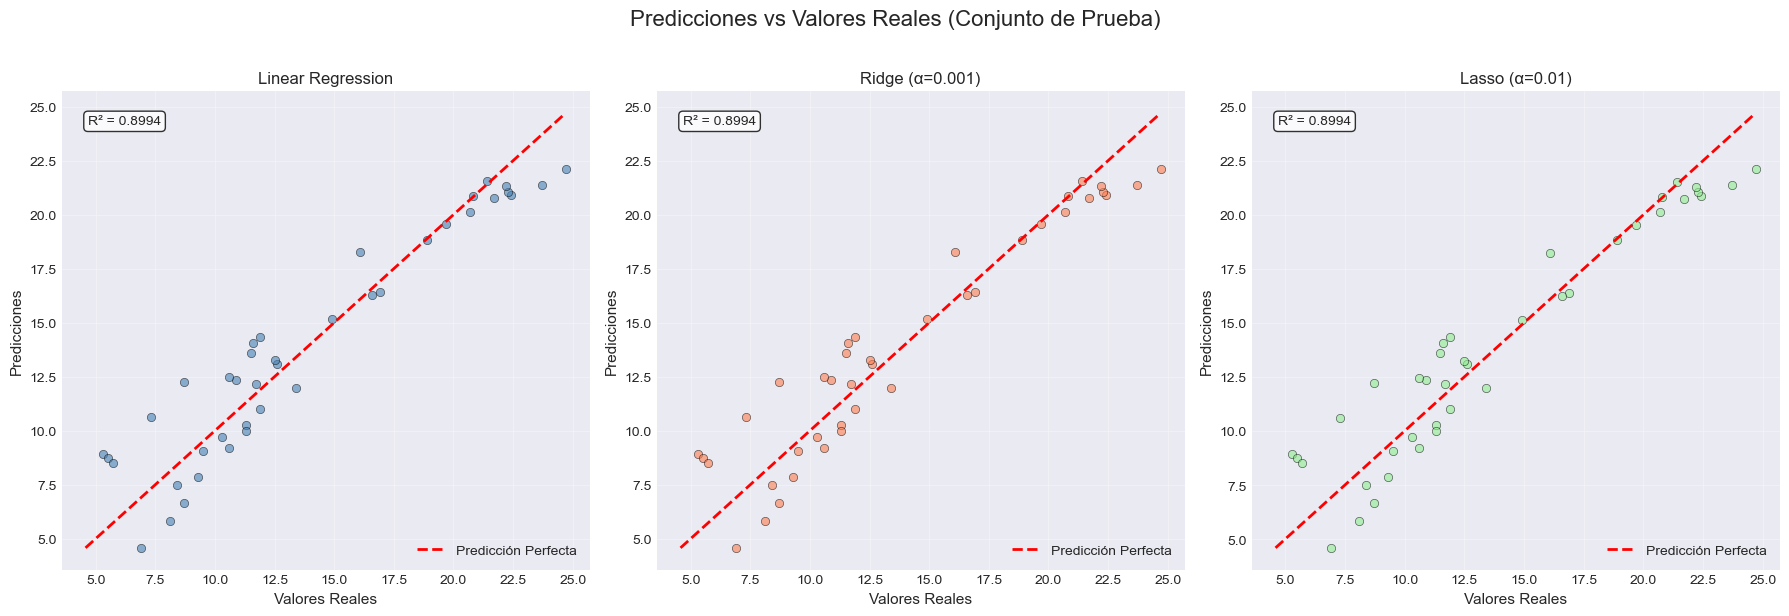

In [23]:
# Gráfico de predicciones vs valores reales para el mejor modelo
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Predicciones vs Valores Reales (Conjunto de Prueba)', fontsize=16, y=1.02)

models_pred = [
    ('Linear Regression', y_pred_lr_test, 'steelblue'),
    (f'Ridge (α={best_alpha_ridge})', y_pred_ridge_test, 'coral'),
    (f'Lasso (α={best_alpha_lasso})', y_pred_lasso_test, 'lightgreen')
]

for ax, (name, predictions, color) in zip(axes, models_pred):
    ax.scatter(y_test, predictions, alpha=0.6, color=color, edgecolors='black', linewidth=0.5)
    
    # Línea perfecta de predicción
    min_val = min(y_test.min(), predictions.min())
    max_val = max(y_test.max(), predictions.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Predicción Perfecta')
    
    ax.set_xlabel('Valores Reales', fontsize=11)
    ax.set_ylabel('Predicciones', fontsize=11)
    ax.set_title(name, fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    # Agregar R² en el gráfico
    r2 = r2_score(y_test, predictions)
    ax.text(0.05, 0.95, f'R² = {r2:.4f}', transform=ax.transAxes,
            fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

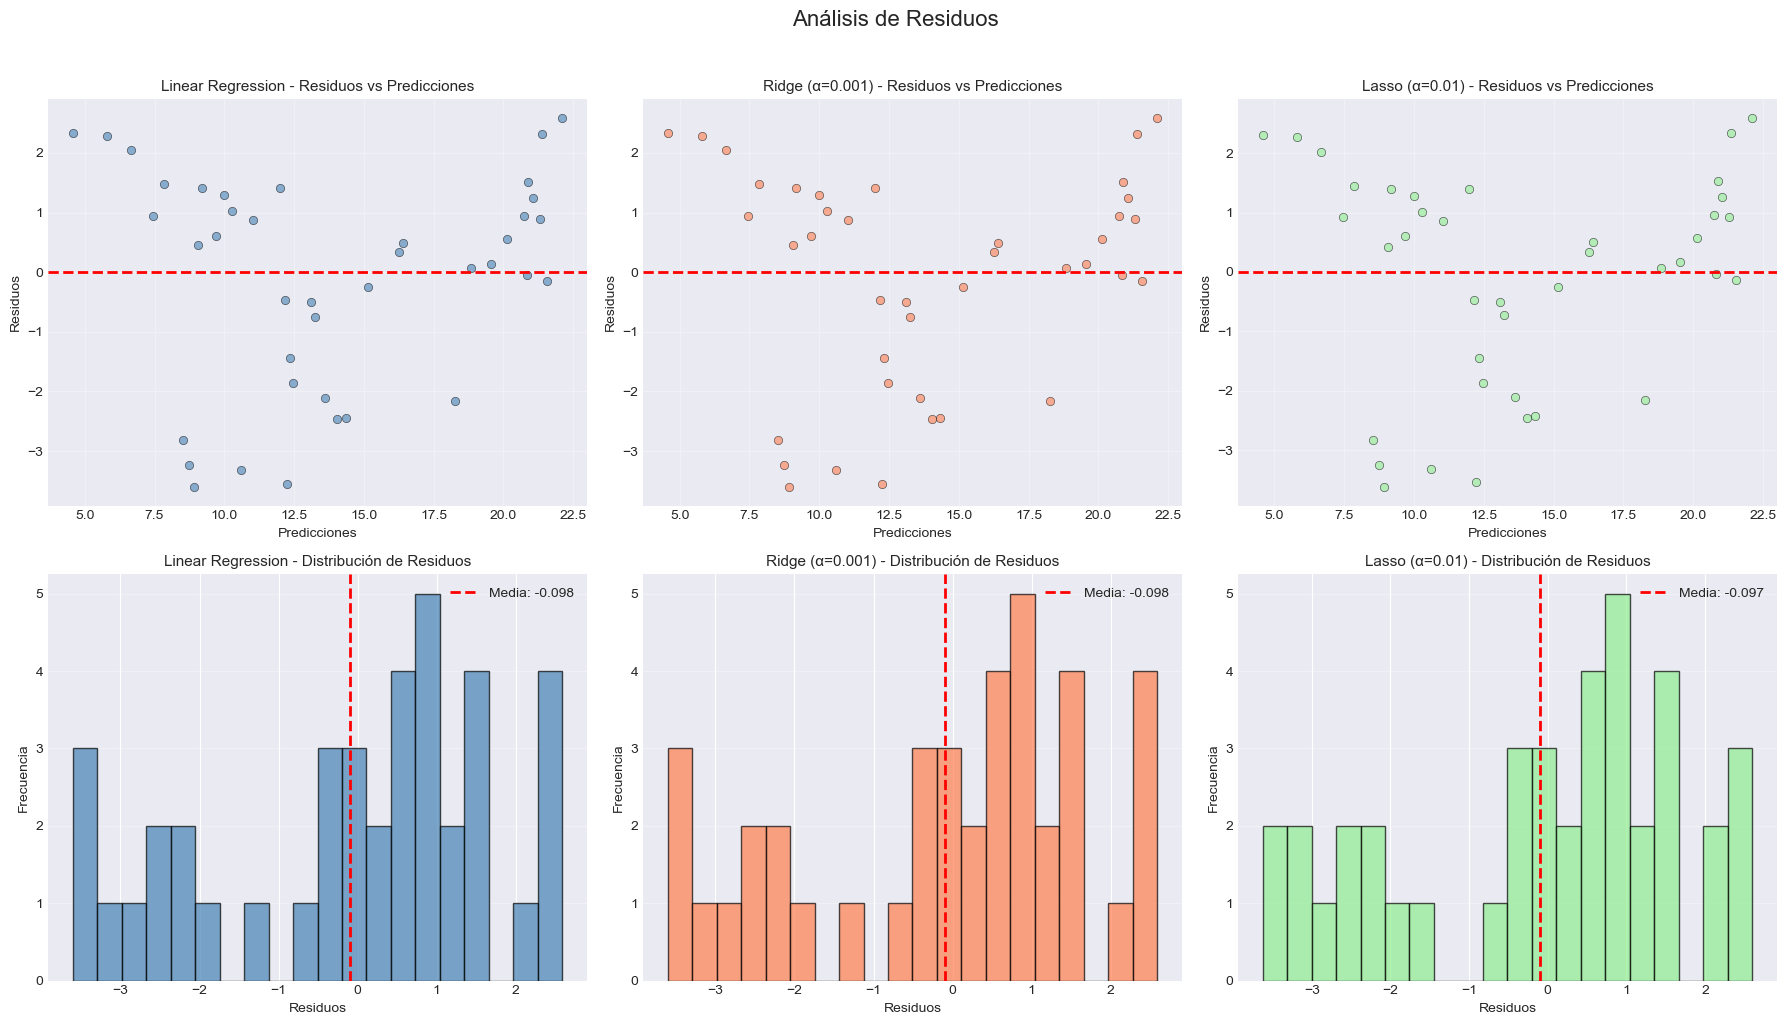

In [24]:
# Análisis de residuos
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Análisis de Residuos', fontsize=16, y=1.02)

models_resid = [
    ('Linear Regression', y_pred_lr_test, 'steelblue'),
    (f'Ridge (α={best_alpha_ridge})', y_pred_ridge_test, 'coral'),
    (f'Lasso (α={best_alpha_lasso})', y_pred_lasso_test, 'lightgreen')
]

for idx, (name, predictions, color) in enumerate(models_resid):
    residuals = y_test - predictions
    
    # Gráfico de residuos vs predicciones
    ax1 = axes[0, idx]
    ax1.scatter(predictions, residuals, alpha=0.6, color=color, edgecolors='black', linewidth=0.5)
    ax1.axhline(y=0, color='red', linestyle='--', linewidth=2)
    ax1.set_xlabel('Predicciones', fontsize=10)
    ax1.set_ylabel('Residuos', fontsize=10)
    ax1.set_title(f'{name} - Residuos vs Predicciones', fontsize=11)
    ax1.grid(True, alpha=0.3)
    
    # Histograma de residuos
    ax2 = axes[1, idx]
    ax2.hist(residuals, bins=20, edgecolor='black', alpha=0.7, color=color)
    ax2.set_xlabel('Residuos', fontsize=10)
    ax2.set_ylabel('Frecuencia', fontsize=10)
    ax2.set_title(f'{name} - Distribución de Residuos', fontsize=11)
    ax2.grid(True, alpha=0.3, axis='y')
    
    # Agregar línea de media
    mean_resid = residuals.mean()
    ax2.axvline(mean_resid, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_resid:.3f}')
    ax2.legend()

plt.tight_layout()
plt.show()

## 6. Conclusiones

### Resumen de Resultados:

1. **Regresión Lineal Normal (OLS)**:
   - Modelo base sin regularización
   - Utiliza todos los predictores sin penalización
   - Puede ser propenso al sobreajuste con más características

2. **Ridge Regression**:
   - Aplica regularización L2 (penaliza la suma de los cuadrados de los coeficientes)
   - Mantiene todas las características pero reduce su magnitud
   - Útil cuando todas las características son potencialmente relevantes

3. **Lasso Regression**:
   - Aplica regularización L1 (penaliza la suma de los valores absolutos de los coeficientes)
   - Puede llevar algunos coeficientes exactamente a cero (selección de características)
   - Útil para identificar las características más importantes

### Observaciones Clave:

- **TV** tiene la correlación más fuerte con las ventas
- **Radio** también muestra una correlación positiva significativa
- **Newspaper** tiene la correlación más débil y puede ser eliminada por Lasso
- Los tres modelos tienen un rendimiento similar, lo que sugiere que el problema es relativamente simple
- La regularización ayuda a prevenir el sobreajuste, especialmente con conjuntos de datos más complejos

In [25]:
# Interpretación práctica del mejor modelo
print("\n" + "="*70)
print("INTERPRETACIÓN PRÁCTICA DEL MODELO")
print("="*70)

# Usar coeficientes del modelo de regresión lineal para interpretación
print("\nInterpretación de los coeficientes (Regresión Lineal):")
print("-" * 60)
for feature, coef in zip(X.columns, lr_model.coef_):
    print(f"\n{feature}:")
    print(f"  • Por cada $1000 adicionales invertidos en {feature}")
    print(f"  • Las ventas aumentan en {coef*1000:.0f} unidades")
    print(f"  • Coeficiente: {coef:.6f}")

print(f"\nIntercepto: {lr_model.intercept_:.2f}")
print("  • Ventas base esperadas sin inversión en publicidad (miles de unidades)")

# Ejemplo de predicción
print("\n" + "="*70)
print("EJEMPLO DE PREDICCIÓN")
print("="*70)
example_budget = pd.DataFrame({
    'TV': [150],
    'Radio': [30],
    'Newspaper': [10]
})

prediction_lr = lr_model.predict(example_budget)[0]
print("\nPresupuesto de ejemplo:")
print(f"  • TV: ${example_budget['TV'][0]:,} mil")
print(f"  • Radio: ${example_budget['Radio'][0]:,} mil")
print(f"  • Newspaper: ${example_budget['Newspaper'][0]:,} mil")
print(f"\nVentas predichas: {prediction_lr:.2f} mil unidades")
print(f"Equivalente a: {prediction_lr*1000:,.0f} unidades")


INTERPRETACIÓN PRÁCTICA DEL MODELO

Interpretación de los coeficientes (Regresión Lineal):
------------------------------------------------------------

TV:
  • Por cada $1000 adicionales invertidos en TV
  • Las ventas aumentan en 45 unidades
  • Coeficiente: 0.044730

Radio:
  • Por cada $1000 adicionales invertidos en Radio
  • Las ventas aumentan en 189 unidades
  • Coeficiente: 0.189195

Newspaper:
  • Por cada $1000 adicionales invertidos en Newspaper
  • Las ventas aumentan en 3 unidades
  • Coeficiente: 0.002761

Intercepto: 2.98
  • Ventas base esperadas sin inversión en publicidad (miles de unidades)

EJEMPLO DE PREDICCIÓN

Presupuesto de ejemplo:
  • TV: $150 mil
  • Radio: $30 mil
  • Newspaper: $10 mil

Ventas predichas: 15.39 mil unidades
Equivalente a: 15,392 unidades
